1.Load and visualize dataset (optional PCA for 2D view).

In [2]:
# Load Dataset

import pandas as pd

df = pd.read_csv("Mall_Customers.csv")  
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# EDA

# Basic info
print(df.info())
print(df.describe())
print("Null Values:\n", df.isnull().sum())
print("Gender Counts:\n", df['Gender'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

C:\Users\Avanee\AppData\Local\Temp\ipykernel_11596\2520507677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, ax=axes[1, 1], palette='Set2').set_title('Gender Distribution')


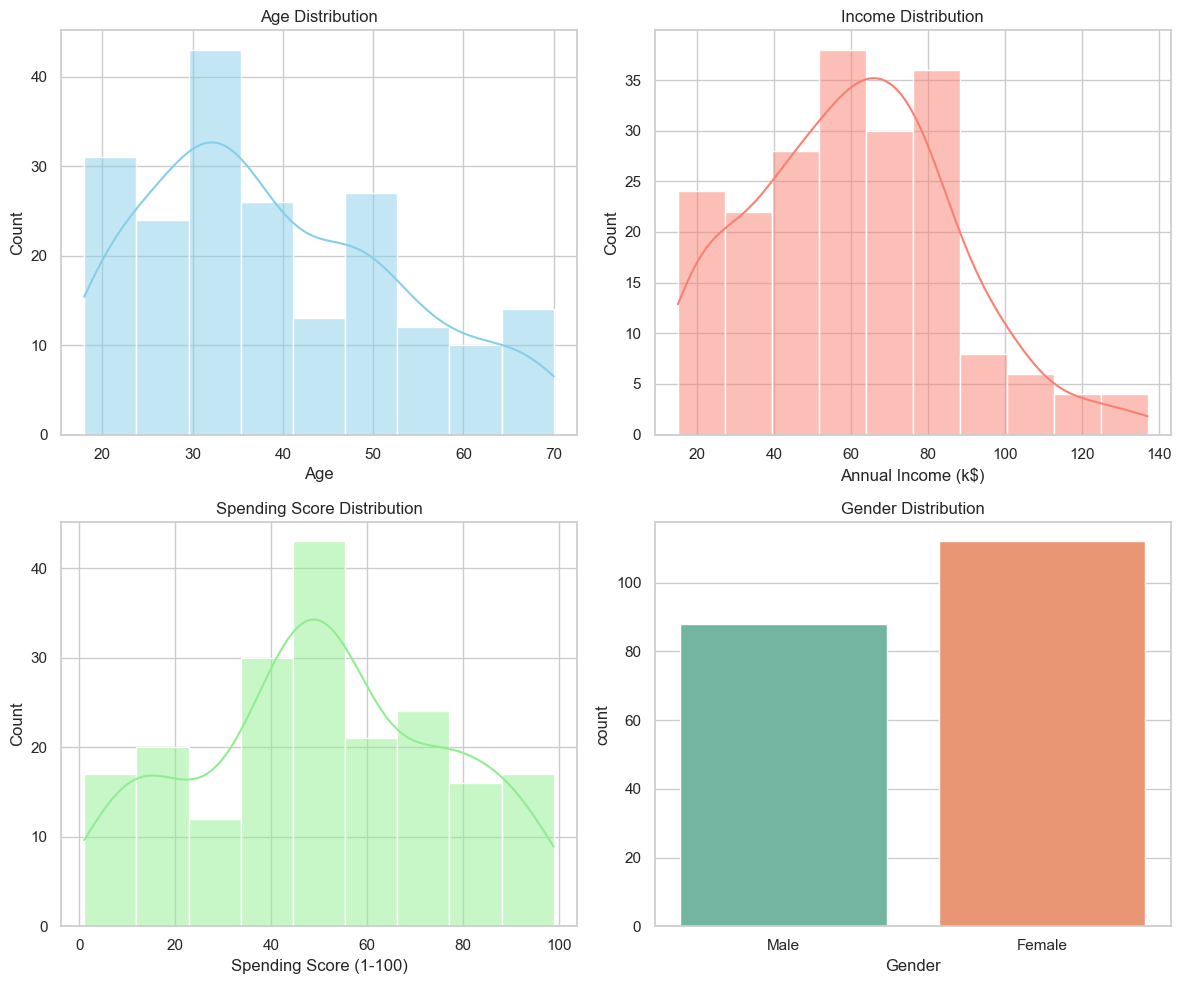

In [6]:
# Plot Distributions

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['Age'], kde=True, ax=axes[0, 0], color='skyblue').set_title('Age Distribution')
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[0, 1], color='salmon').set_title('Income Distribution')
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[1, 0], color='lightgreen').set_title('Spending Score Distribution')
sns.countplot(x='Gender', data=df, ax=axes[1, 1], palette='Set2').set_title('Gender Distribution')

plt.tight_layout()
plt.show()

2.Fit K-Means and assign cluster labels.

In [8]:
# Preprocessing

from sklearn.preprocessing import LabelEncoder

data = df.drop(['CustomerID'], axis=1)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Male = 1, Female = 0

3.Use the Elbow Method to find optimal K.

C:\Users\Avanee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Avanee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Avanee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Avanee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

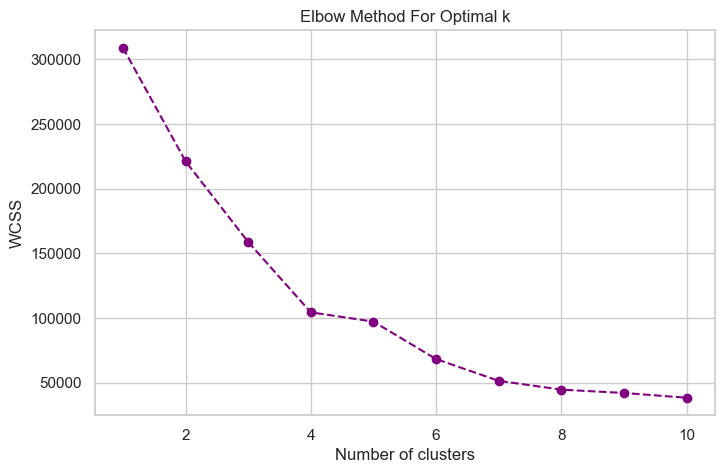

In [13]:
# Elbow Method (Optimal K)

from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='purple')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [15]:
# 6. Apply KMeans with optimal K

optimal_k = 5  # Pick this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

C:\Users\Avanee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4.Visualize clusters with color-coding.

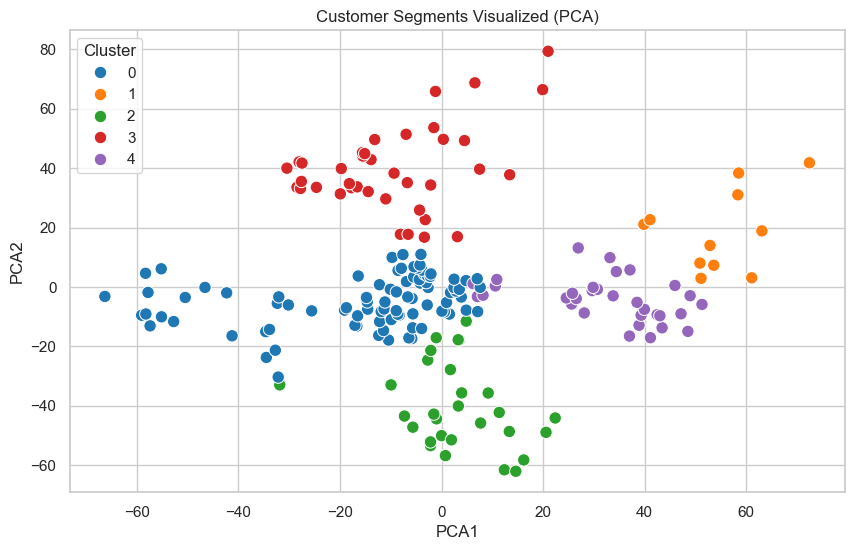

In [19]:
# Visualize Clusters with PCA (2D)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data.drop('Cluster', axis=1))
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=data, s=80)
plt.title("Customer Segments Visualized (PCA)")
plt.grid(True)
plt.show()

5.Evaluate clustering using Silhouette Score.

In [21]:
# Evaluate Using Silhouette Score

from sklearn.metrics import silhouette_score

score = silhouette_score(data.drop(['Cluster', 'PCA1', 'PCA2'], axis=1), data['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {score:.4f}")

Silhouette Score for k=5: 0.3574
